<a href="https://colab.research.google.com/github/PamelaKinga/Data_Visualization/blob/main/Pokemon_ft_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Data from Kaggle

Data source: https://www.kaggle.com/datasets/rounakbanik/pokemon

In [1]:
# First mount Gdrive to Colab for these steps to work
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! kaggle datasets download -d rounakbanik/pokemon
! unzip pokemon.zip

  0% 0.00/46.6k [00:00<?, ?B/s]
100% 46.6k/46.6k [00:00<00:00, 2.20MB/s]
Archive:  pokemon.zip
  inflating: pokemon.csv             


## Install Libraries & Load Data


In [3]:
# Import all the libraries needed
import pandas as pd
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import warnings
# for tables
# import holoviews as hv
# from holoviews import opts, dim

In [4]:
df=pd.read_csv('pokemon.csv')

# Explore Null Values

Explore Missing Values

In [5]:
# Quickly describe non-null count and give dtype per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
# How many null values per column
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [7]:
# to check to the total sum of missing values
df.isnull().sum().sum()


522

In [8]:
# print only columns containing some null values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

# If necessary: Print only columns containing a threshold of available data i.e. 85%
# nan_cols85 = [i for i in df.columns if df[i].isnull().sum() > 0.85*len(df)]

['height_m', 'percentage_male', 'type2', 'weight_kg']


In [9]:
# Total nulls (where there is null) per column
df.isnull().sum()[df.columns[df.isnull().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

In [10]:
# Getting the percentage of the null count by column
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

height_m            2.496879
percentage_male    12.234707
type2              47.940075
weight_kg           2.496879
dtype: float64

# Clean Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

Discovered that some columns have bad data

In [12]:
# check data before cleaning
# series is an object type because one element is a string of 2 inputs '30 (Meteorite)255 (Core)'
df.capture_rate.unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [13]:
df['capture_rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
df['capture_rate'] = pd.to_numeric(df['capture_rate'])
# inplace = True is used here, not advised as it mutates the original state of the df, but in this case, I use it with caution

In [14]:
# after cleaning
df.capture_rate.unique()

array([ 45., 255., 120., 127.,  90., 190.,  75., 235., 150.,  25., 170.,
        50., 200., 100., 180.,  60., 225.,  30.,  35.,   3.,  65.,  70.,
       125., 205., 155., 145., 130., 140.,  15., 220., 160.,  80.,  55.,
        nan])

In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
abilities,801,482,['Levitate'],29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
against_bug,801.0,NaN,NaN,NaN,0.996255,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,NaN,NaN,NaN,1.057116,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,NaN,NaN,NaN,0.968789,0.353058,0.0,1.0,1.0,1.0,2.0
against_electric,801.0,NaN,NaN,NaN,1.07397,0.654962,0.0,0.5,1.0,1.0,4.0
against_fairy,801.0,NaN,NaN,NaN,1.068976,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,NaN,NaN,NaN,1.065543,0.717251,0.0,0.5,1.0,1.0,4.0
against_fire,801.0,NaN,NaN,NaN,1.135456,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,NaN,NaN,NaN,1.192884,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,NaN,NaN,NaN,0.985019,0.558256,0.0,1.0,1.0,1.0,4.0


# Explore Data

Basic data exploration

In [16]:
#Some basic descriptive outputs
print(f'Unique primary types: {df["type1"].nunique()}')
print(f'Unique secondary types: {df["type2"].nunique()}')
print(f'Unique generations: {df["generation"].nunique()}')
print(f'Unique names: {df["name"].nunique()}')
print(f'Unique abilities: {df["abilities"].nunique()}')
print(f'Unique classfication: {df["classfication"].nunique()}')

Unique primary types: 18
Unique secondary types: 18
Unique generations: 7
Unique names: 801
Unique abilities: 482
Unique classfication: 588


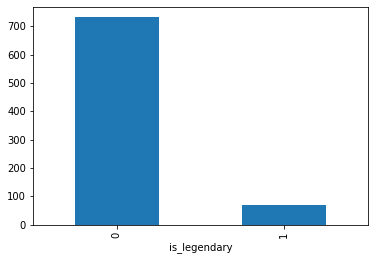

In [17]:
# How many legendary Pokemon are there? (There are 70 legendary, 731 non-legendary)
legendary_cnt = df.groupby("is_legendary")["name"].count()
legendary_cnt.plot.bar()

In [18]:
# How many generations of Pokemon are there? 
generation_cnt = df.groupby("generation")["name"].count()
print(generation_cnt)

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: name, dtype: int64


In [19]:
# Create a new column for Base Total
df_short = df.filter(['name','pokedex_number','is_legendary','generation','base_total','hp','sp_attack', 'attack', 'speed','sp_defense','defense', 'weight_kg', 'height_m'], axis=1)
print(df_short)

           name  pokedex_number  is_legendary  generation  base_total   hp  \
0     Bulbasaur               1             0           1         318   45   
1       Ivysaur               2             0           1         405   60   
2      Venusaur               3             0           1         625   80   
3    Charmander               4             0           1         309   39   
4    Charmeleon               5             0           1         405   58   
..          ...             ...           ...         ...         ...  ...   
796  Celesteela             797             1           7         570   97   
797     Kartana             798             1           7         570   59   
798    Guzzlord             799             1           7         570  223   
799    Necrozma             800             1           7         600   97   
800    Magearna             801             1           7         600   80   

     sp_attack  attack  speed  sp_defense  defense  weight_kg  

In [20]:
# Top 10 by weight
top_hp = df_short.sort_values(by=['weight_kg'], ascending=False)
top_hp.head(10)

,name,pokedex_number,is_legendary,generation,base_total,hp,sp_attack,attack,speed,sp_defense,defense,weight_kg,height_m
789,Cosmoem,790,1,7,400,43,29,29,37,131,131,999.9,0.1
796,Celesteela,797,1,7,570,97,107,101,61,101,103,999.9,9.2
382,Groudon,383,1,3,770,100,150,180,90,90,160,950.0,3.5
749,Mudsdale,750,0,7,500,100,55,125,35,85,100,920.0,2.5
798,Guzzlord,799,1,7,570,223,97,101,43,53,53,888.0,5.5
486,Giratina,487,1,4,680,150,120,120,90,100,100,750.0,4.5
482,Dialga,483,1,4,680,100,150,120,90,100,120,683.0,5.4
375,Metagross,376,0,3,700,80,105,145,110,110,150,550.0,1.6
712,Avalugg,713,0,6,514,95,44,117,28,46,184,505.0,2.0
142,Snorlax,143,0,1,540,160,65,110,30,110,65,460.0,2.1


In [21]:
df_short['BMI'] = df_short.apply(lambda bmi: bmi['weight_kg']/(bmi['height_m']**2), axis=1)
print(df_short)

           name  pokedex_number  is_legendary  generation  base_total   hp  \
0     Bulbasaur               1             0           1         318   45   
1       Ivysaur               2             0           1         405   60   
2      Venusaur               3             0           1         625   80   
3    Charmander               4             0           1         309   39   
4    Charmeleon               5             0           1         405   58   
..          ...             ...           ...         ...         ...  ...   
796  Celesteela             797             1           7         570   97   
797     Kartana             798             1           7         570   59   
798    Guzzlord             799             1           7         570  223   
799    Necrozma             800             1           7         600   97   
800    Magearna             801             1           7         600   80   

     sp_attack  attack  speed  sp_defense  defense  weight_kg  

# Data Visualization


In [23]:
# How many legendary Pokemon are there? (There are 70 legendary, 731 non-legendary)
n_by_legendary = df.groupby("is_legendary")["name"].count()
print(n_by_legendary)

is_legendary
0    731
1     70
Name: name, dtype: int64


In [24]:
# Create two dataframes, one for Legendary Pokemon, and one for Non-Legendary Pokemon
leg_df = df[(df.is_legendary == 1)]
non_leg_df = df[(df.is_legendary == 0)]
#leg_df.head()

In [25]:
# Row count of legendary df
leg_df.shape[0]
# = 70

70

In [26]:
# Row count of non-legendary Pokemon
non_leg_df.shape[0]
# = 731

731

In [27]:
# Average capture rate of legendary pokemon
#leg_df['capture_rate'].mean()

rounded_mean_decimal_0 = round(leg_df['capture_rate'].mean(),1) # specified decimal place as 0
print(rounded_mean_decimal_0)


18.0


Countplots

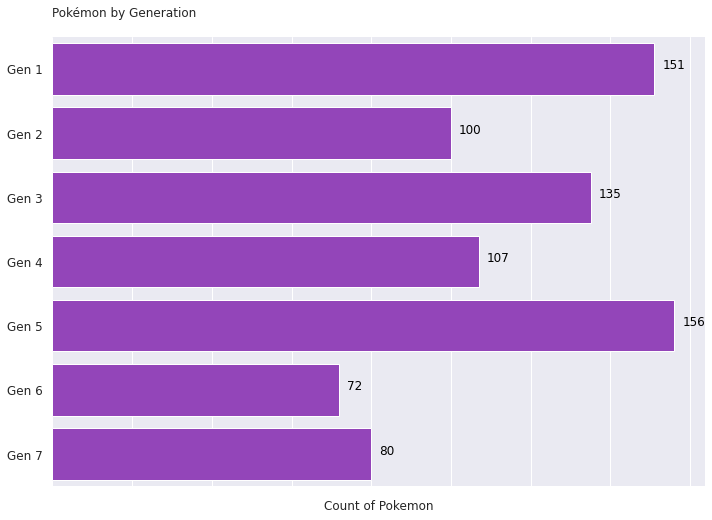

In [28]:
## Chart 1.0: Pokemon by Generation

# Set variable for tick labels
generations = [f'Gen {g}' for g in df_short.generation.unique()]

# Create countplot in seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(y=df_short.generation, orient='v', color='darkorchid')

# Set lables and title
ax.set_xlabel(xlabel='Count of Pokemon')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
ax.set_yticklabels(generations, size=12)

ax.set_title('Pokémon by Generation', loc='left', pad=20)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Annotate counts of Pokemon per generation on plot
for index, value in enumerate(df_short.generation.value_counts().sort_index()): 
    plt.annotate(f'{value}', xy=(value + 2, index), color='black') 

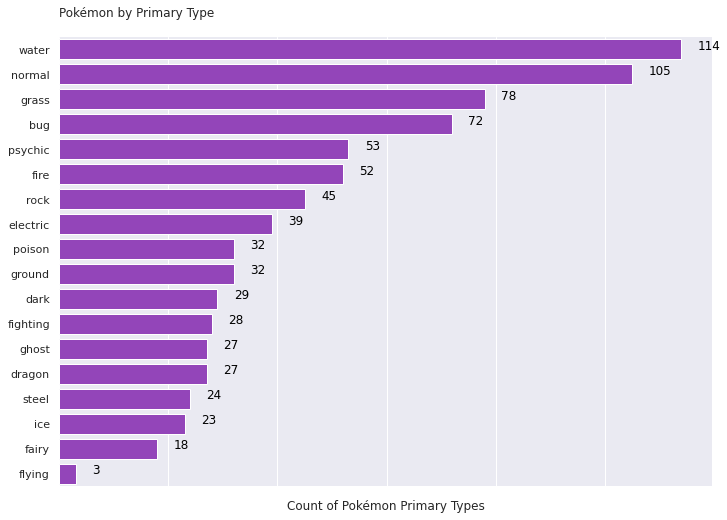

In [29]:
## Chart 2.0: Pokemon by Primary Type

# Create countplot in seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(y = df.type1, orient='v', color='darkorchid', order = df['type1'].value_counts().index)

# Set lables and title
ax.set_xlabel(xlabel='Count of Pokémon Primary Types')
ax.set_xticklabels([])

ax.set_ylabel(ylabel='')
#ax.set_yticklabels(labels, size = 10)

ax.set_title('Pokémon by Primary Type', loc='left', pad=20)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Annotate counts of Pokemon per generation on plot
for index, value in enumerate(df.type1.value_counts()): 
    plt.annotate(f'{value}', xy=(value + 3, index), color='black') 

Looking at Fairy and Dark types

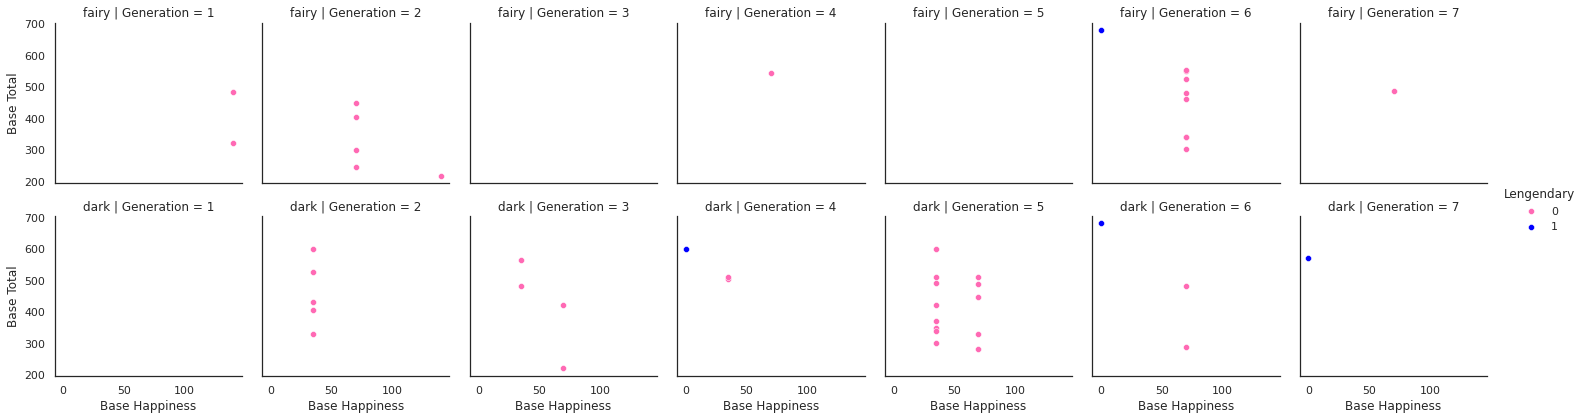

In [31]:
# Dataframe filtering for only fairy and dark type1              
darkfairy = df[(df['type1'] == 'fairy') | (df['type1'] == 'dark' )]

# Plotting Fairy and Dark
sns.set_style('white')

grid = sns.FacetGrid(darkfairy, col = 'generation' , row = 'type1', hue = "is_legendary", palette=['hotpink', 'blue'])
grid.map_dataframe(sns.scatterplot, y= "base_total", x="base_happiness")

# Add formatting
grid.set_axis_labels('Base Happiness', 'Base Total')
grid.set_titles(col_template = 'Generation = {col_name}', row_template ='{row_name}');

grid.add_legend(title = 'Lengendary')

# Set spines (optional)
sns.despine(top=True, right=True, left=False, bottom=False)

In [32]:
# Counts of dark and fairy by legendary
darkfairy.groupby(["type1", "is_legendary"])['name'].count()

type1  is_legendary
dark   0               26
       1                3
fairy  0               17
       1                1
Name: name, dtype: int64

In [33]:
# Counts of dark and fairy by generation
darkfairy.groupby(["type1", "generation"])['name'].count()

type1  generation
dark   2              5
       3              4
       4              3
       5             13
       6              3
       7              1
fairy  1              2
       2              5
       4              1
       6              9
       7              1
Name: name, dtype: int64

In [ ]:
# Plotting all types
sns.set_style('white')

grid = sns.FacetGrid(df, col = 'generation' , row = 'type1', hue = "is_legendary", palette=['hotpink', 'blue'])
grid.map_dataframe(sns.scatterplot, y= "base_total", x="base_happiness")

# Add formatting
grid.set_axis_labels('Base Happiness', 'Base Total')
grid.set_titles(col_template = 'Generation = {col_name}', row_template ='{row_name}');

grid.add_legend(title = 'Lengendary')

# Set spines (optional)
sns.despine(top=True, right=True, left=False, bottom=False)



Box plots

In [34]:
# Before creating boxplots, define a variable to compute the boxplot median values and plot them 

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

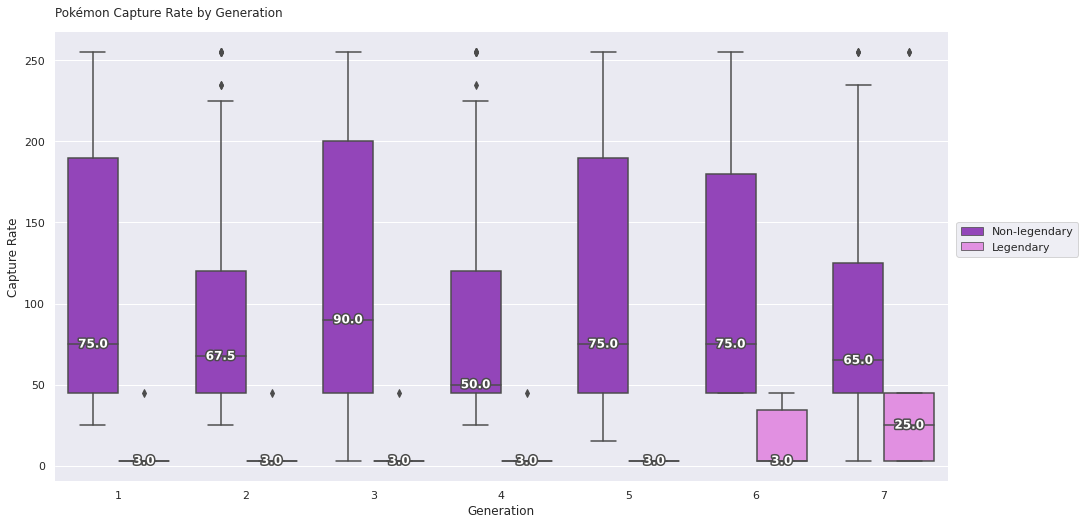

In [35]:
# Create a boxplot of capture rates by generation categories and legendary detail
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(data = df, x = 'generation', y = 'capture_rate', hue = 'is_legendary', palette=['darkorchid', 'violet'])

# Set Title
ax.set_title('Pokémon Capture Rate by Generation', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='Generation')
ax.set_ylabel(ylabel='Capture Rate')

# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1.01,0.5));

add_median_labels(ax)

In [ ]:
# Create a boxplot of capture rates by type1 (no legendary detail)
sns.set(rc={'figure.figsize':(14,6)})
ax = sns.boxplot(data = df, x = 'type1', y = 'capture_rate', palette=['blue', 'lightblue'])

# Set Title
ax.set_title('Pokémon Capture Rate by Primary Type', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='')
ax.set_ylabel(ylabel='Capture Rate')


ax.tick_params(axis='x', rotation=65)

add_median_labels(ax)

In [ ]:
# Create a boxplot of capture rates by type1 and legendary detail
sns.set(rc={'figure.figsize':(16,8.27)})

ax = sns.boxplot(data = df, x = 'type1', y = 'capture_rate', hue = 'is_legendary', palette=['darkorchid', 'violet'])

# Set Title
ax.set_title('Pokémon Capture Rate by Primary Type', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')

ax.tick_params(axis='x', rotation=65)


# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1.01,0.5));

In [ ]:
# Finding the strongest/ best group of Pokemon by base total and generation

# Set variable for tick labels
generations = [f'Gen {g}' for g in df.generation.unique()]

# Build plot
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(data = df, x = 'generation', y='base_total', hue = 'is_legendary', palette=['darkorchid', 'violet'])

# Set Title
ax.set_title('Pokémon Base Total by Generation', loc='left', pad=15)

# Set axis titles
ax.set_xlabel(xlabel='Generation')
ax.set_ylabel(ylabel='Base Total')

ax.tick_params(axis='x')

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1.01,0.5));

add_median_labels(ax)



In [ ]:
# Create a Top 10 dataframe by Total Base
top_10 = df_short.sort_values(by=['base_total'], ascending=False).reset_index()[:10]

# Build plot
sns.set(rc={'figure.figsize':(8,8.27)})
ax = sns.barplot(data = top_10, x = 'base_total', y='name', hue = 'is_legendary', palette=['darkorchid', 'violet'], dodge = False)

# Set Title
ax.set_title('Top 10 Pokémon by Base Total', loc='left', pad=15)

# Set axis titles
ax.set_xlabel(xlabel='Base Total')
ax.set_ylabel(ylabel='')

# Format Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1.01,0.5));

# Annotate counts of Pokemon per generation on plot
for index, value in enumerate(top_10.base_total): 
    plt.annotate(f'{value}', xy=(value + 2, index + .2), color='black') 


In [ ]:
# Top 10 detail
top_10

In [ ]:
# Create a Top 10 dataframe by Total Base
top = df.sort_values(by=['base_total'], ascending=False).reset_index()[:10]
top.T

Radar Charts

In [ ]:
# Create lists of items to rank for Pokemons to include in radar chart

attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']

mewtwo= top_10[top_10['name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top_10[top_10['name'] == 'Rayquaza'][attributes].values.tolist()[0]
groudon = top_10[top_10['name'] == 'Groudon'][attributes].values.tolist()[0]
kyogre = top_10[top_10['name'] == 'Kyogre'][attributes].values.tolist()[0]

# Create radar plot

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

# Mewtwo Plot
ax.plot(angles, mewtwo, 'o-', color='#997996', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='#997996')

# Rayquaza Plot
ax.plot(angles,rayquaza, 'o-', color='#418A5B', linewidth=1, label='Rayquaza')
ax.fill(angles, rayquaza, alpha=0.25, color='#418A5B')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Mewtwo', 'Rayquaza'], loc=(0,0.99));

ax.set_title("Mewtwo vs Rayquaza", loc='left', pad=40);

In [ ]:
#Radar Chart

attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']

mewtwo= top_10[top_10['name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top_10[top_10['name'] == 'Rayquaza'][attributes].values.tolist()[0]
groudon = top_10[top_10['name'] == 'Groudon'][attributes].values.tolist()[0]
kyogre = top_10[top_10['name'] == 'Kyogre'][attributes].values.tolist()[0]

# Create radar plot

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
kyogre.append(kyogre[0])
groudon.append(groudon[0])


fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

# Groudon Plot
ax.plot(angles, groudon, 'o-', color='#C53023', linewidth=1, label='Groudon')
ax.fill(angles, groudon, alpha=0.25, color='#C53023')

# Kyogre Plot
ax.plot(angles, kyogre, 'o-', color='#0271B9', linewidth=1, label='Kyogre')
ax.fill(angles, kyogre, alpha=0.25, color='#0271B9')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Groudon', 'Kyogre'], loc=(0,0.99));

ax.set_title("Groudon vs Kyogre", loc='left', pad=40);

In [ ]:
#Radar Chart

attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']

mewtwo= top_10[top_10['name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top_10[top_10['name'] == 'Rayquaza'][attributes].values.tolist()[0]
groudon = top_10[top_10['name'] == 'Groudon'][attributes].values.tolist()[0]
kyogre = top_10[top_10['name'] == 'Kyogre'][attributes].values.tolist()[0]

# Create radar plot

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
attributes.append(attributes[0])
kyogre.append(kyogre[0])
groudon.append(groudon[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

# Groudon Plot
ax.plot(angles, groudon, 'o-', color='#C53023', linewidth=1, label='Groudon')
ax.fill(angles, groudon, alpha=0.25, color='#C53023')

# Kyogre Plot
ax.plot(angles, kyogre, 'o-', color='#0271B9', linewidth=1, label='Kyogre')
ax.fill(angles, kyogre, alpha=0.25, color='#0271B9')

# Mewtwo Plot
ax.plot(angles, mewtwo, 'o-', color='#997996', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='#997996')

# Rayquaza Plot
ax.plot(angles,rayquaza, 'o-', color='#418A5B', linewidth=1, label='Rayquaza')
ax.fill(angles, rayquaza, alpha=0.25, color='#418A5B')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Groudon', 'Kyogre', 'Mewtwo', 'Rayquaza'], loc=(-.1,.1));

ax.set_title("Top 4 Pokemon Battle", loc='left', pad=40);

In [ ]:
# Mewtwo and Rayquaza Type Effectiveness Heat Map
against_columns = ['against_psychic', 'against_dragon']

top2 = df[(df['name'] == 'Mewtwo') | (df['name'] == 'Rayquaza' )]

# To calculate median effectiveness between the two types
pyschic_dragon_effectiveness = top2.groupby(['type1']).sum()[against_columns].T

# Heat map by type
ax = sns.heatmap(pokemon_type_effectiveness,
            annot= True,
            fmt = ".1f",
            vmin = 0,
            vmax = 4,
            cbar=False,
            cmap='Reds')

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Effect on Primary Type In Battle Against:')

ax.annotate('Lighter = Low, Darker = High', xy=(0, 0), xytext=(0, -0.05), color='grey', size=12)

ax.set_title('Mewtwo vs Rayquaza Type Effectiveness Chart', loc='left', pad=30);

In [ ]:
# Top 2 Effectiveness Matrix
against_columns2 = ['against_ground', 'against_water']

top3 = df[(df['name'] == 'Groudon') | (df['name'] == 'Kyogre' )]

# To calculate median effectiveness between the two types
ground_water_effectiveness = top3.groupby(['type1']).sum()[against_columns2].T

# Heat map by type
ax = sns.heatmap(ground_water_effectiveness,
            annot= True,
            fmt = ".1f",
            vmin = 0,
            vmax = 4,
            cbar=False,
            cmap='Reds')

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Effect on Primary Type In Battle Against:')

ax.annotate('Lighter = Low, Darker = High', xy=(0, 0), xytext=(0, -0.05), color='grey', size=12)

ax.set_title('Groudon vs Kyogre Type Effectiveness Chart', loc='left', pad=30);